In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../')


from astroLuSt.preprocessing import outlierremoval as alprou


import importlib
importlib.reload(alprou)

#style for plotting
plt.style.use('astroLuSt.styles.LuSt_style')

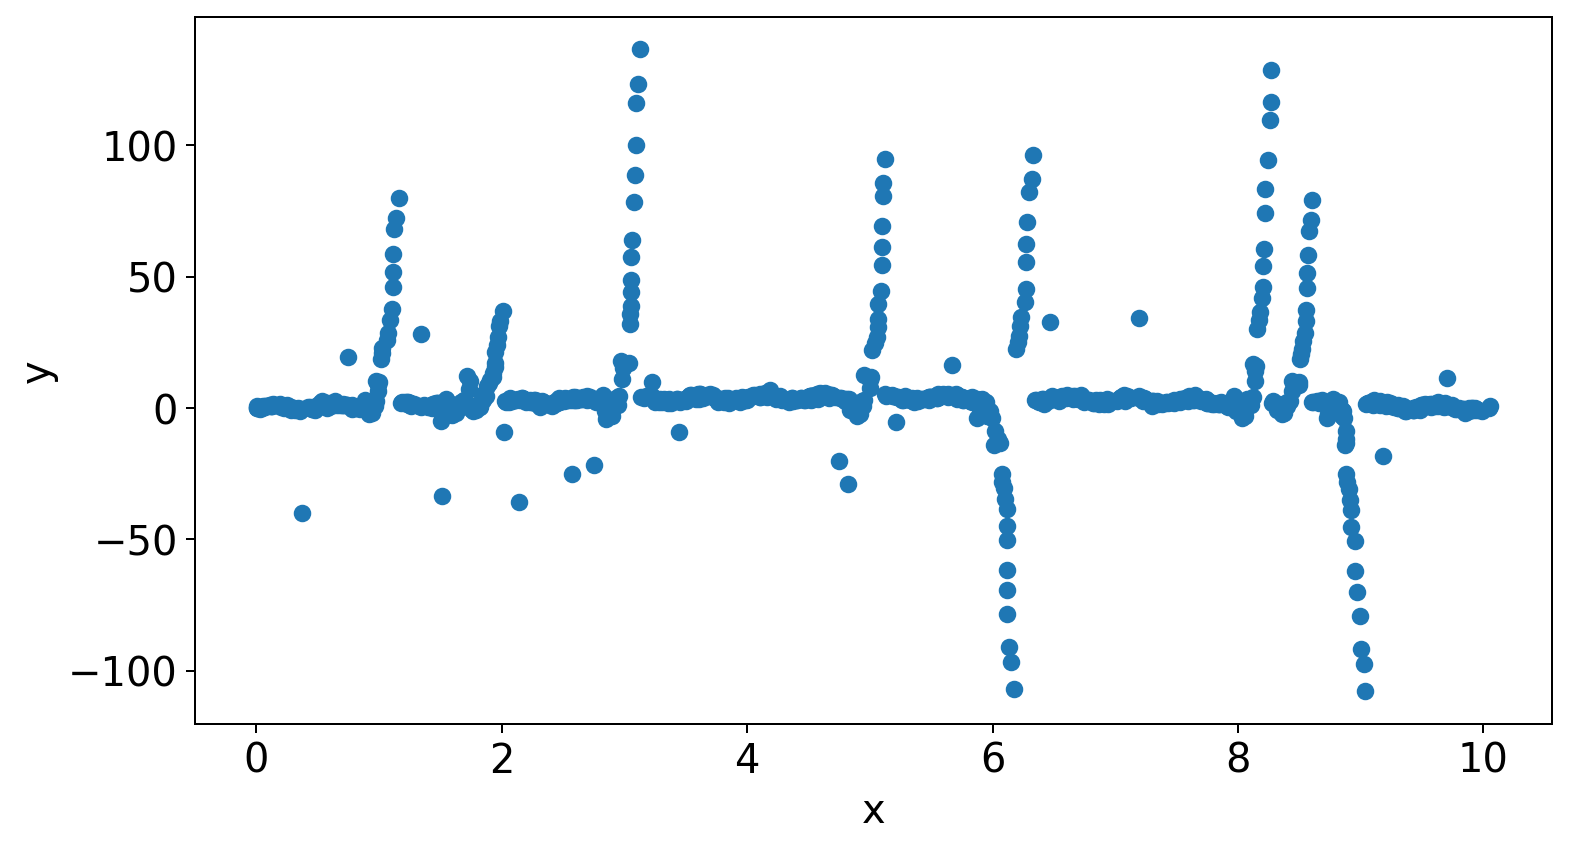

In [2]:
#generate some data
rng = np.random.default_rng(seed=0) #set random seed

##periods
p1 = 0.5
p2 = 20

##basic noisy sine wave
x = np.linspace(0,p2/2,1000)
x += rng.standard_normal(size=x.shape)*0.05
x = np.sort(x)
y = np.sin(x*2*np.pi/p1) + rng.standard_normal(size=x.shape)*0.5

##add underlying variation
y += 4*np.sin(x*2*np.pi/p2)

idxs = np.arange(x.shape[0])

#add some outliers
##uniform outliers
noutliers = 30
y[rng.choice(idxs, size=noutliers, replace=False)] += rng.uniform(-40,40, size=noutliers)

##consecutive string of datapoints
noutliers_sop = 10
nprestring_sop = 30
xout_sop = np.linspace(0,15,nprestring_sop)
yout_sop = .01* (xout_sop**3) + 1*rng.standard_normal(xout_sop.shape[0])
randidxs = rng.choice(idxs[:-nprestring_sop], size=noutliers_sop, replace=False)
for ridx in randidxs:
    sop_idxs = range(ridx,ridx+xout_sop.shape[0])
    y[sop_idxs] = ((-1)**ridx) * yout_sop * rng.uniform(1,4)


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y)

ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()


# `PercentileClipping`

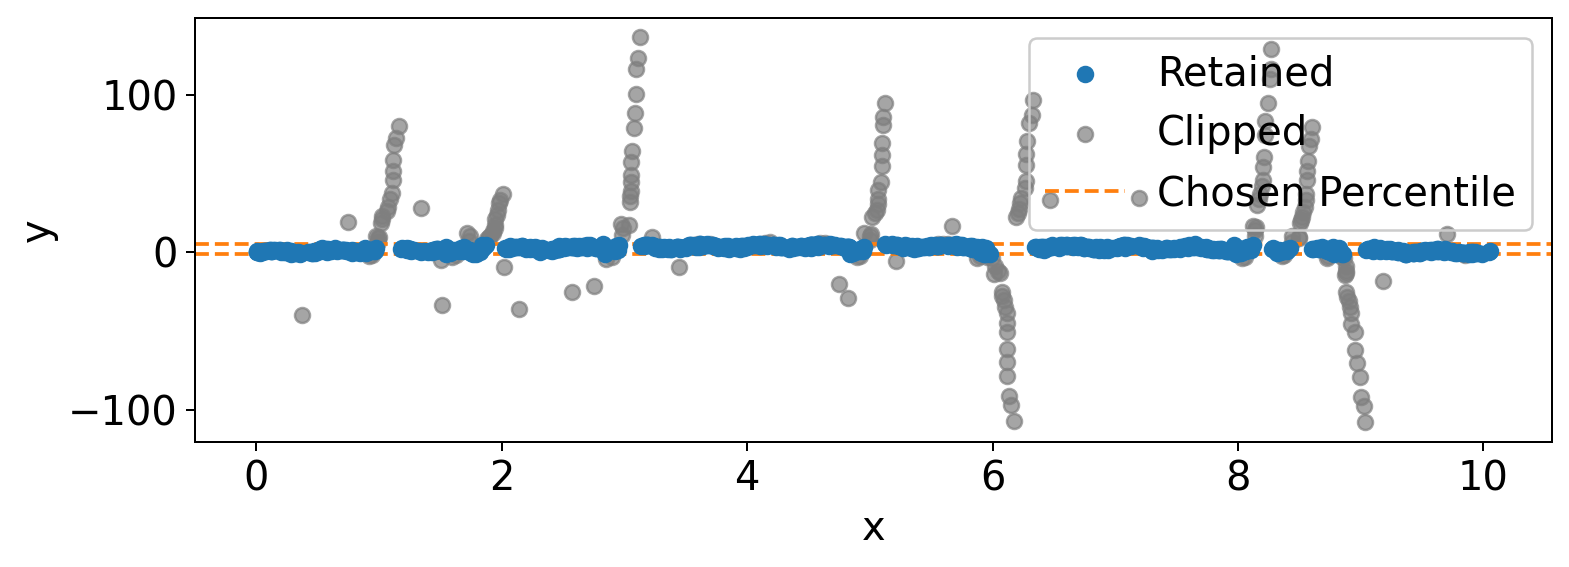

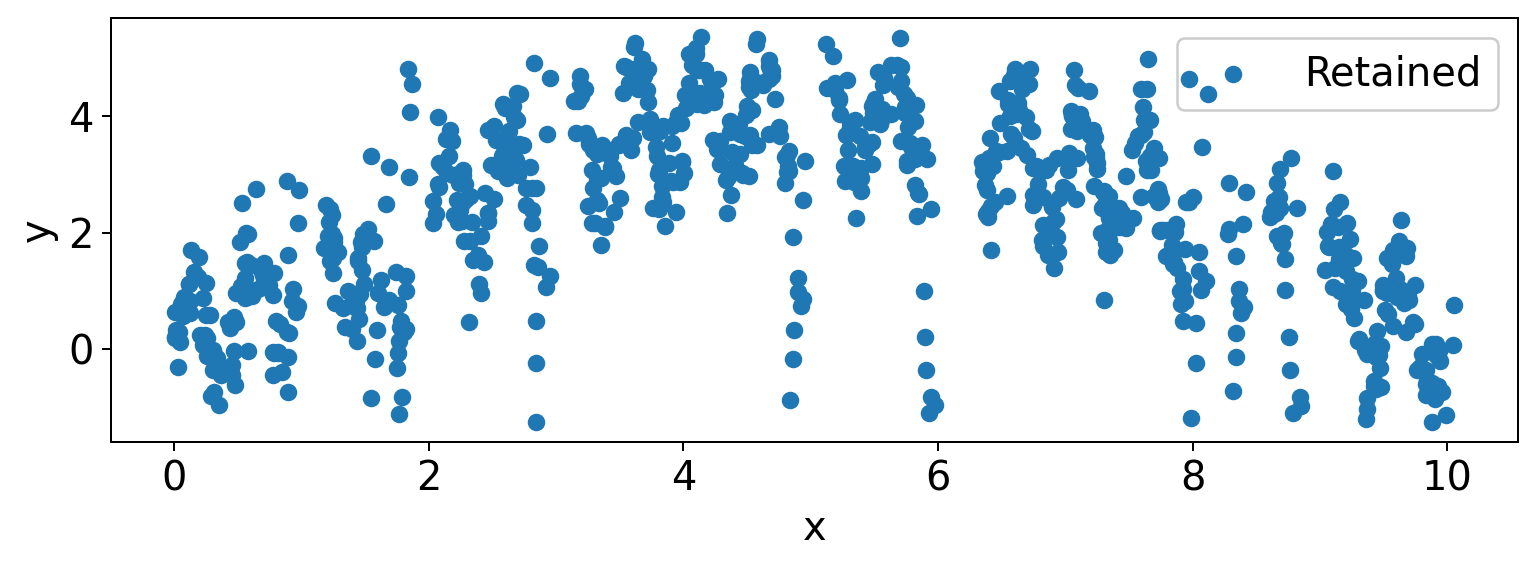

In [3]:
PC = alprou.PercentileClipping(pmin=7, pmax=87)
PC.fit(x, y)
x_pc, y_pc = PC.transform(x, y)

fig, axs = PC.plot_result(show_cut=True, show_bounds=True)
fig.set_figheight(3)
fig, axs = PC.plot_result(show_cut=False, show_bounds=False)
fig.set_figheight(3)
plt.show()

# `SigmaClipping`

### Using `Binning`

INFO(SigmaClipping): Executing iteration #1/2
INFO(SigmaClipping): Executing iteration #2/2


/home/lukas/github/astroLuSt/demos/preprocessing/../../astroLuSt/preprocessing/binning.py:387: RuntimeWarning: Mean of empty slice
  self.x_binned  = np.append(self.x_binned,  meanfunc_x(self.x[iv_bool]))
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


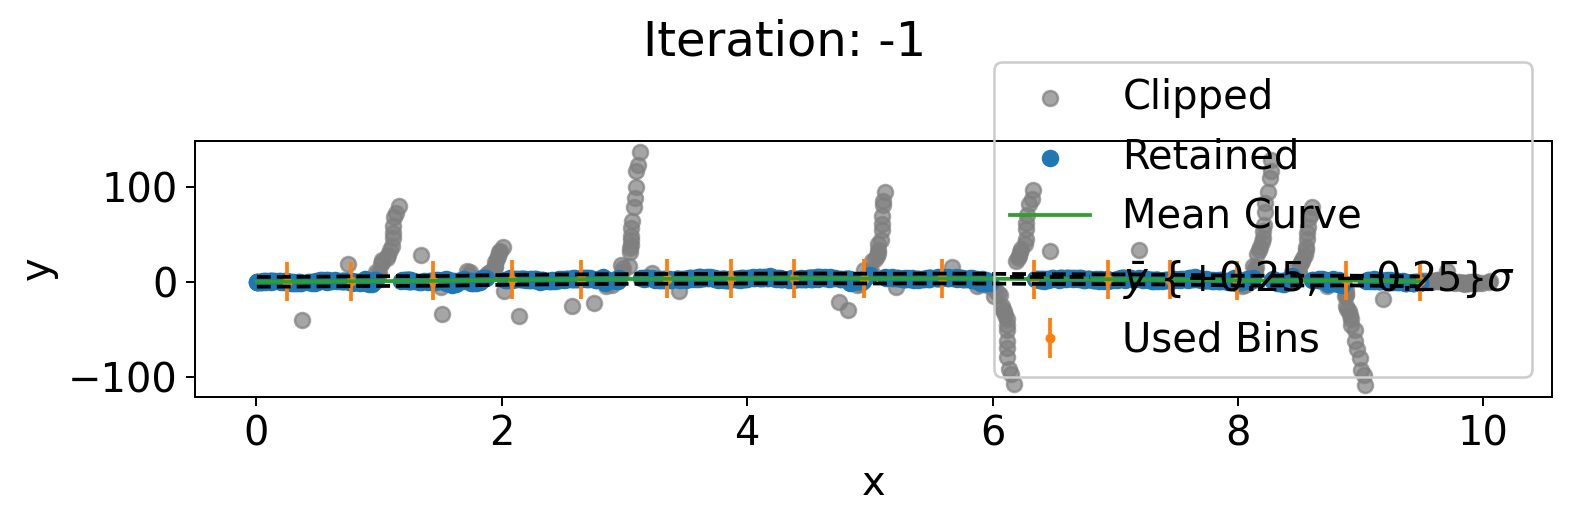

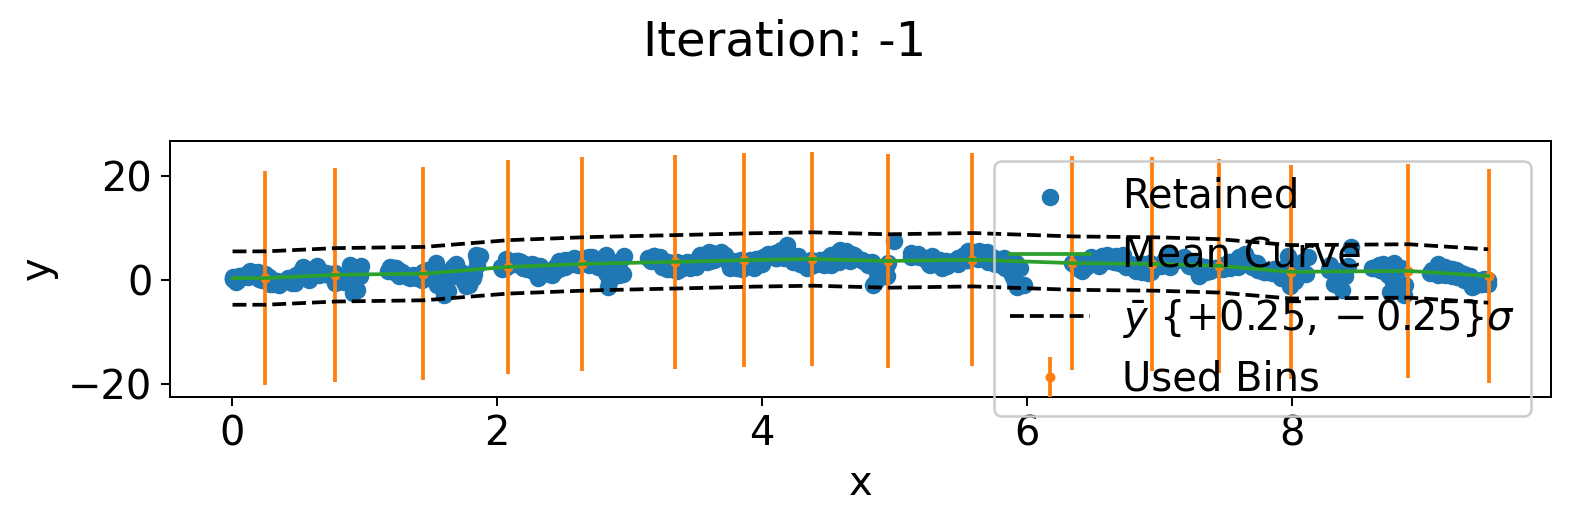

In [4]:
importlib.reload(alprou)

SC = alprou.SigmaClipping(
    sigma_bottom=.25, sigma_top=.25,
    nintervals=100, npoints_per_interval=0.05,
    bound_history=False,
    clipmask_history=False,
    verbose=0,
    binning_kwargs=dict(
        meanfunc_x=np.nanmean,
        meanfunc_y=np.nanmedian,
    )
)

SC.fit(x, y, n_iter=2, verbose=2)
x_sc, y_sc = SC.transform(x, y)

fig, axs = SC.plot_result(show_cut=True, iteration=-1)
fig.set_figheight(3)
fig, axs = SC.plot_result(show_cut=False, iteration=-1)
fig.set_figheight(3)
plt.show()

### Using Legendre-Polynomials

INFO(SigmaClipping): Executing iteration #1/3
INFO(SigmaClipping): Executing iteration #2/3
INFO(SigmaClipping): Executing iteration #3/3


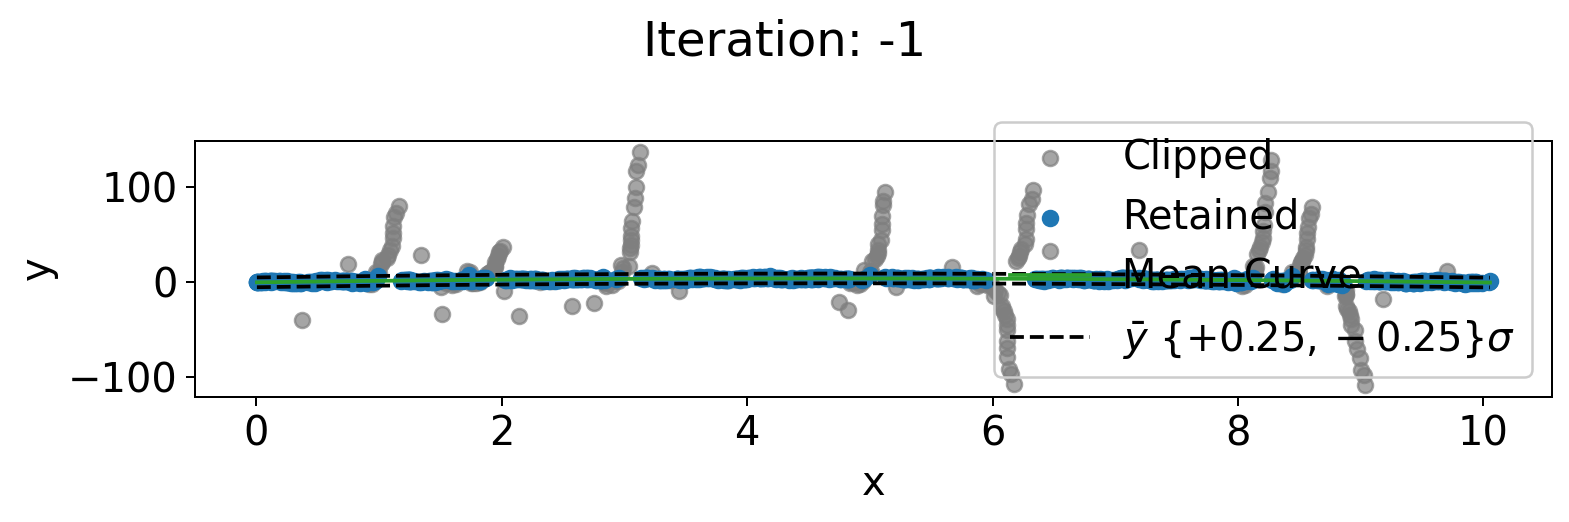

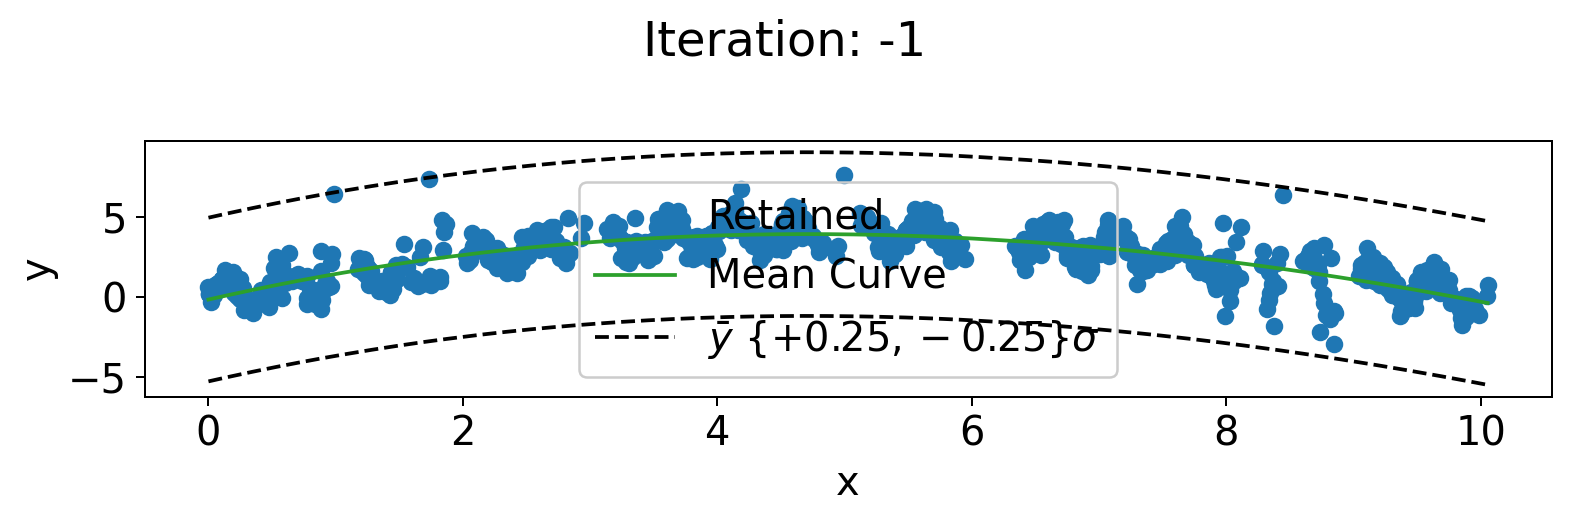

In [5]:
importlib.reload(alprou)

SC = alprou.SigmaClipping(
    sigma_bottom=.25, sigma_top=.25,
    use_polynomial=True, poly_degree=3, use_init_curve_sigma=True,
    bound_history=False,
    clipmask_history=False,
    verbose=0,
)

SC.fit(x, y, n_iter=3, verbose=2)
x_sc, y_sc = SC.transform(x, y)

fig, axs = SC.plot_result(show_cut=True, iteration=-1)
fig.set_figheight(3)
fig, axs = SC.plot_result(show_cut=False, iteration=-1)
fig.set_figheight(3)
plt.show()

# `StringOfPearls`
* Removing consecutive outliers

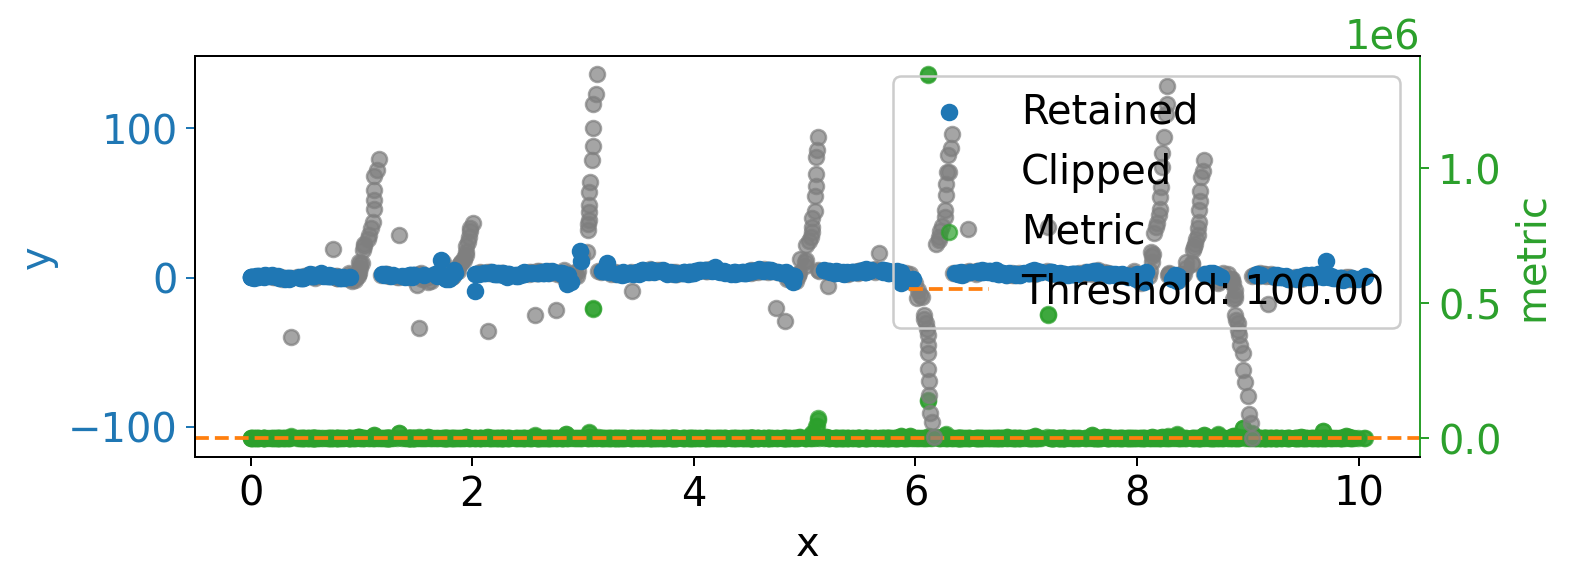

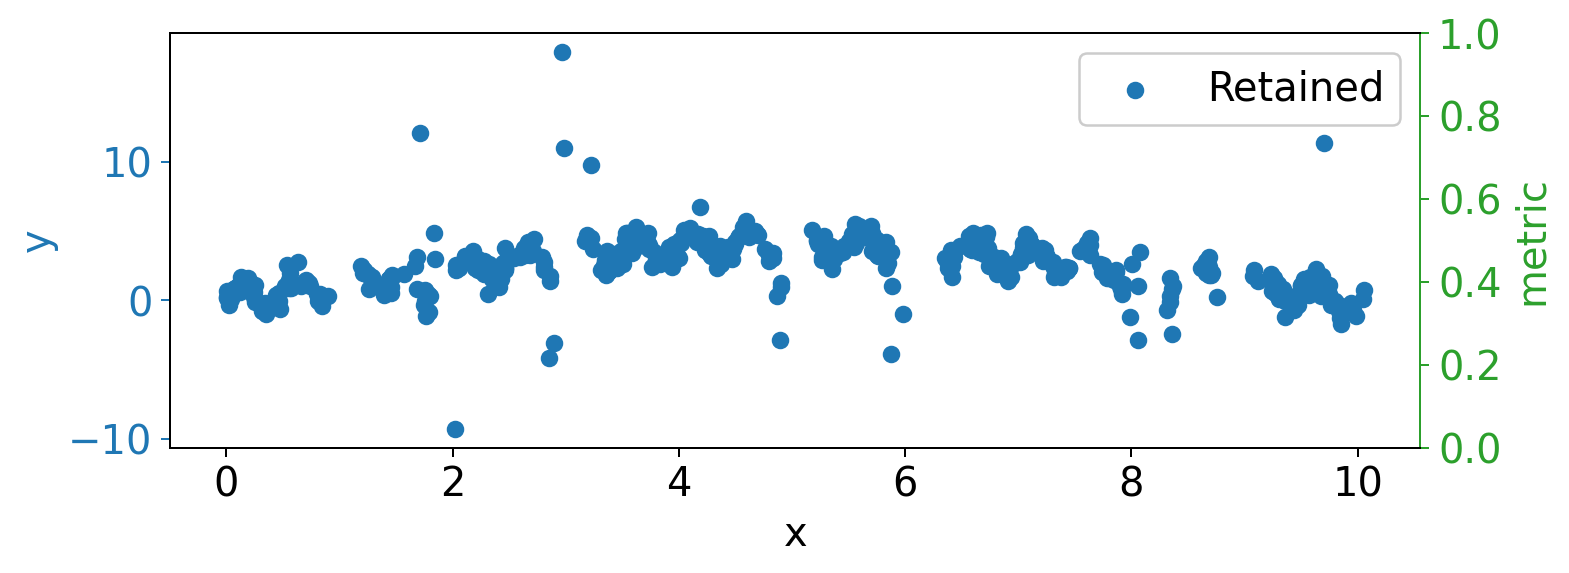

In [6]:
importlib.reload(alprou)

SOP = alprou.StringOfPearls(
    window_size=3, th=100,
    metric=None,
    looseness=0,
    window=None,
    verbose=0
)

SOP.fit(x, y)
x_sop, y_sop = SOP.transform(x, y)

fig, axs = SOP.plot_result(show_cut=True, show_metric=True)
fig.set_figheight(3)
fig, axs = SOP.plot_result(show_cut=False, show_metric=False)
fig.set_figheight(3)
plt.show()